<a href="https://colab.research.google.com/github/OnsongoMabeya/Descision_trees_Animals_Dataset/blob/main/Week_8%2C_9_%26_10_Decision_tree_Animals_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Load dataset

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("/content/animals.csv", header='infer')

In [3]:
data

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize,Class
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
86,87,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
87,88,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
88,89,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6


In [4]:
data.shape

(90, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sr         90 non-null     int64
 1    Hair      90 non-null     int64
 2    Feathers  90 non-null     int64
 3    Eggs      90 non-null     int64
 4    Milk      90 non-null     int64
 5    Airborne  90 non-null     int64
 6    Aquatic   90 non-null     int64
 7    Predator  90 non-null     int64
 8    Teeth     90 non-null     int64
 9    Backbone  90 non-null     int64
 10   Breathes  90 non-null     int64
 11   Venemous  90 non-null     int64
 12   Fins      90 non-null     int64
 13   Legs      90 non-null     int64
 14   Tails     90 non-null     int64
 15   Domestic  90 non-null     int64
 16   Catsize   90 non-null     int64
 17  Class      90 non-null     int64
dtypes: int64(18)
memory usage: 12.8 KB


---
- all the data is already in binary
---
- We are now going to use descision trees
- it is in sklearn

In [6]:
from sklearn import tree

In [7]:
y = data['Class']

In [8]:
y

0     1
1     1
2     4
3     1
4     1
     ..
85    7
86    4
87    2
88    6
89    5
Name: Class, Length: 90, dtype: int64

In [9]:
X = data.drop(['Class'], axis=1)

In [10]:
X

,Sr,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Teeth,Backbone,Breathes,Venemous,Fins,Legs,Tails,Domestic,Catsize
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0
86,87,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1
87,88,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1
88,89,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0


---
- Let us make our descision tree

In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [12]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

---
- Now we need to train the descision tree

In [13]:
clf = clf.fit(X, y)

In [14]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

---
- let us visualize it

In [15]:
import pydotplus

In [16]:
from IPython.display import Image

In [17]:
dot_data=tree.export_graphviz(clf, feature_names = X.columns,
                              filled=True,
                              out_file=None)

In [18]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=" Milk <= 0.5\\nentropy = 2.361\\nsamples = 90\\nvalue = [37, 18, 3, 12, 4, 7, 9]", fillcolor="#f8decb"] ;\n1 [label=" Teeth <= 0.5\\nentropy = 2.35\\nsamples = 53\\nvalue = [0, 18, 3, 12, 4, 7, 9]", fillcolor="#f4fbe2"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=" Backbone <= 0.5\\nentropy = 1.463\\nsamples = 34\\nvalue = [0, 18, 0, 0, 0, 7, 9]", fillcolor="#e5f6b8"] ;\n1 -> 2 ;\n3 [label="entropy = 0.989\\nsamples = 16\\nvalue = [0, 0, 0, 0, 0, 7, 9]", fillcolor="#f9d3e4"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 18\\nvalue = [0, 18, 0, 0, 0, 0, 0]", fillcolor="#b7e539"] ;\n2 -> 4 ;\n5 [label=" Fins <= 0.5\\nentropy = 1.312\\nsamples = 19\\nvalue = [0, 0, 3, 12, 4, 0, 0]", fillcolor="#95f1f0"] ;\n1 -> 5 ;\n6 [label="entropy = 0.985\\nsamples = 7\\nvalue = [0, 0, 3, 0, 4, 0, 0]", fillcolor="#ced5f8"] ;\n5 -> 6 ;\n7 [l

In [19]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [20]:
graph

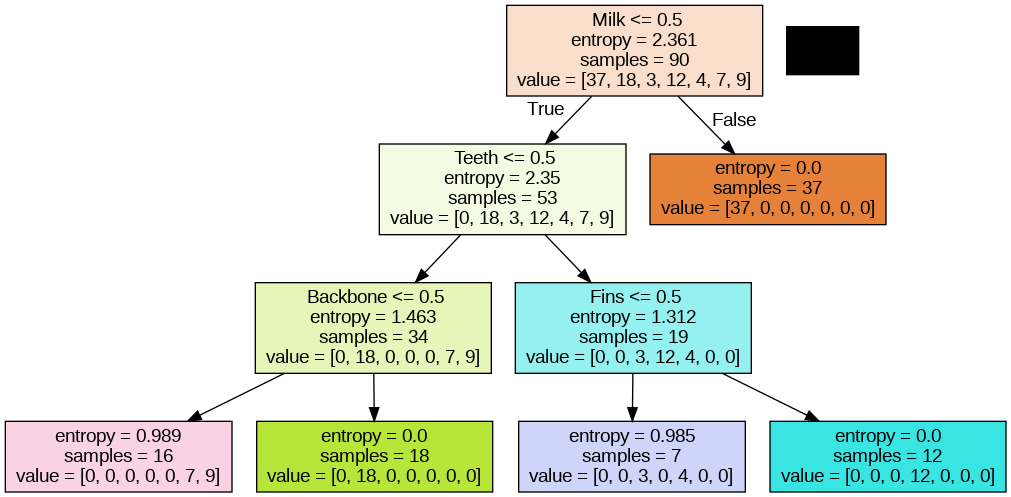

In [21]:
graph

Image(graph.create_png())